# Basemap and netCDF data

### Plot netCDF data from NOMADS server

In [1]:
import  netCDF4
from    mpl_toolkits.basemap import Basemap
import  matplotlib.pyplot as plt
import  numpy  as np
import  warnings 
import  time

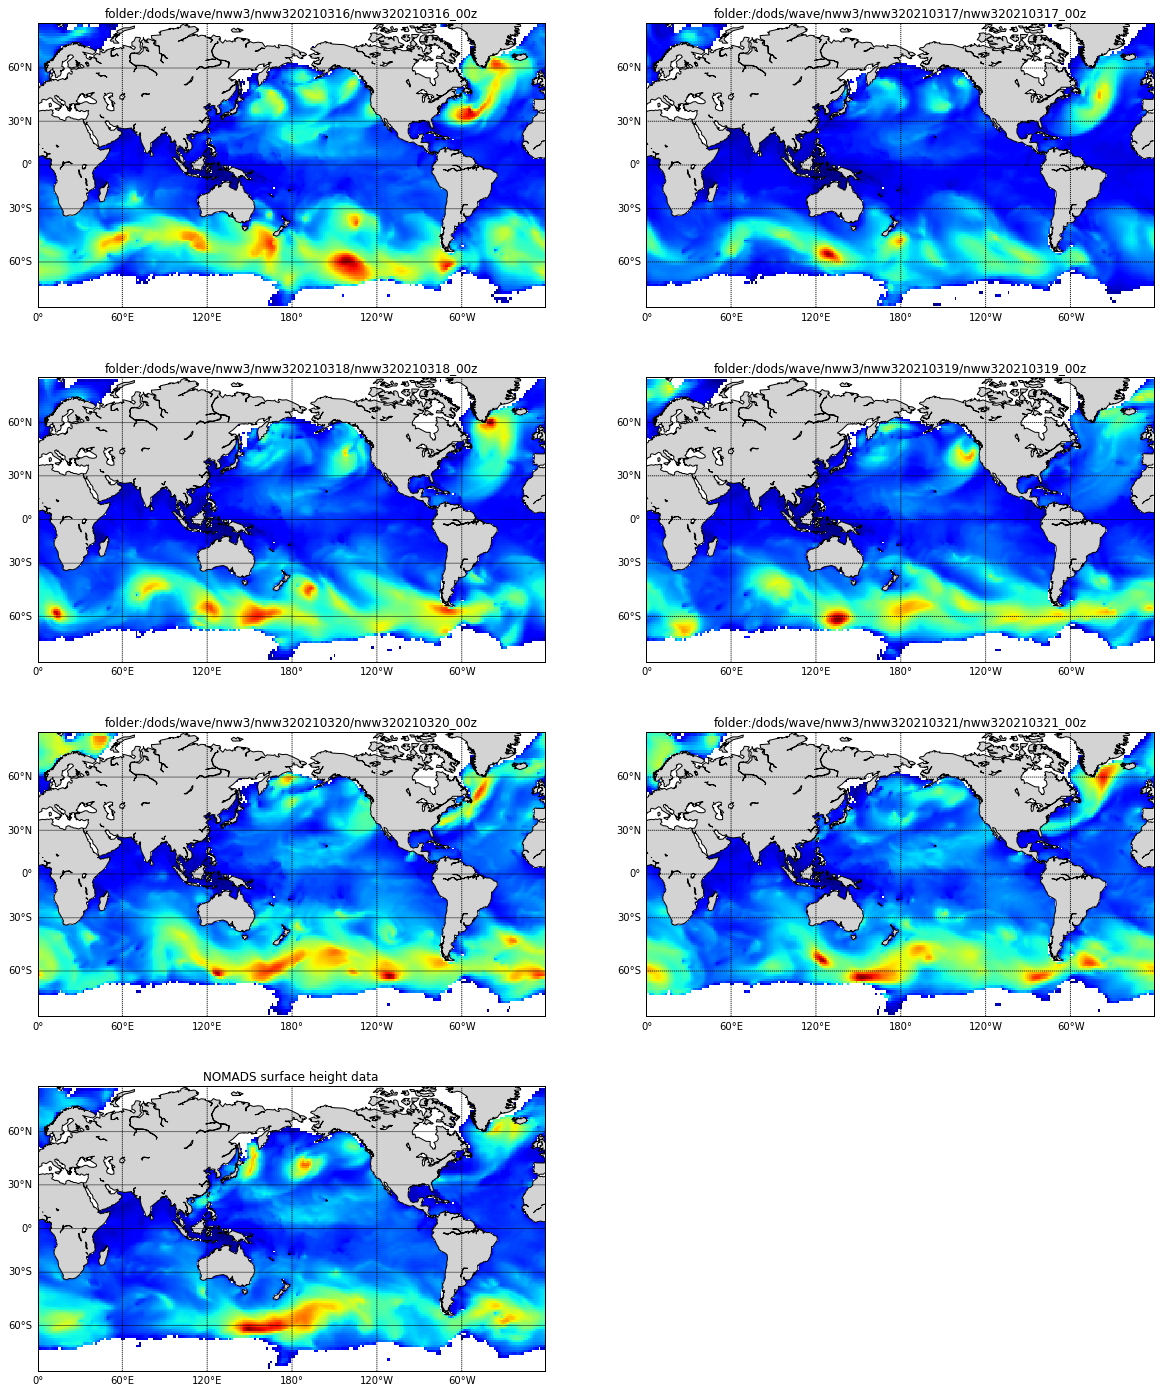

In [2]:
folders = ['320210316', '320210317', '320210318', '320210319', 
                        '320210320', '320210321', '320210322']

fig, axs = plt.subplots(4, 2)
fig.set_figheight(25)
fig.set_figwidth(20)
 
k = 0  
i = 0
j = 0
for file in folders:
    url  = 'https://nomads.ncep.noaa.gov/dods/wave/nww3/nww'+ file +'/nww'+ file +'_00z'
    #print ("url:",url)
    try:
        netcdfdata = netCDF4.Dataset(url)
    except Exception as e:
        print("netCDF url error: ", e)

    lat    = netcdfdata.variables['lat'][:]
    lon    = netcdfdata.variables['lon'][:]
    # surface height of combined wind waves and swell
    htsgwsfc = netcdfdata.variables['htsgwsfc'][1,:,:]
    netcdfdata.close()
    netcdfdata = None

    # Use Miller projection
    map = Basemap (projection='mill', 
               lat_ts=10, 
               llcrnrlon =lon.min(),  urcrnrlon =lon.max(),
               llcrnrlat =lat.min(),  urcrnrlat =lat.max(),
               resolution = 'c',
               ax=axs[i,j] )

    x, y = map (*np.meshgrid(lon,lat))

    # plot using the fast pcolormesh routine
    # set jet colormap
    map.pcolormesh(x, y, htsgwsfc, shading='auto', cmap=plt.cm.jet)
    #map.colorbar(location='bottom', pad=0.5, shrink=0.5)
    
    map.drawcoastlines()
    map.fillcontinents(color= 'lightgray')
    map.drawmapboundary()
    map.drawparallels(np.arange(-90.0, 90.0, 30), labels = [1,0,0,0])
    map.drawmeridians(np.arange(-180.0, 180.0, 60), labels = [0,0,0,1])

    axs[i,j].set_title('folder:/dods/wave/nww3/nww'+ file +'/nww'+ file +'_00z')
    
    k += 1
    j += 1    
    if k!=1 and k % 2 == 0:
        i += 1
        j =  0

fig.delaxes(axs[3,1])   
plt.title('NOMADS surface height data')
plt.show()


## Plot netCDF NOAA climate model data

NOAA climate model data for the average temperature in the first day of  2021

In [3]:
import  netCDF4
import  wget
from    pathlib import Path
import  os
import  xarray as xr
from    pathlib import Path
import  matplotlib
import  pprint

100% [........................................................................] 19472314 / 19472314
Download complete
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: COARDS
    title: 4x daily NMC reanalysis (2014)
    history: created 2017/12 by Hoop (netCDF2.3)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.html
    dimensions(sizes): lat(73), lon(144), time(1288)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 air(time, lat, lon)
    groups: 


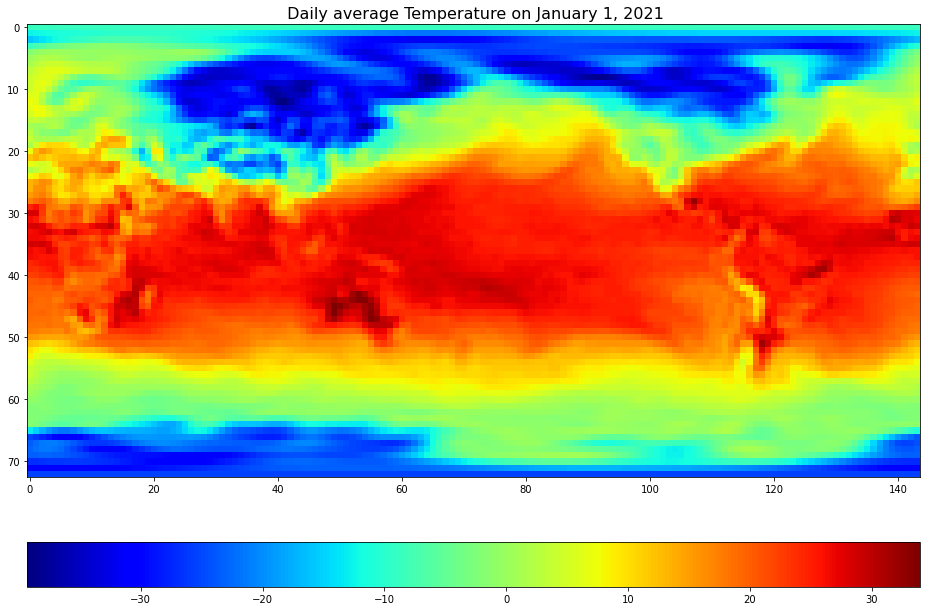

In [4]:
filename = 'air.sig995.2021.nc'
download_path = str(Path.home() / "Downloads")

url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/surface/' + filename

if not os.path.exists(download_path+ '\\' + filename):
    print("Downloading to the folder:", download_path)
    download_file  = wget.download(url, out=download_path)
    print("\nDownload complete")   
 
dataset = netCDF4.Dataset(download_path+ '\\' + filename)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(dataset)

fig = plt.figure(figsize = (16,12))

avg_air_temp = dataset.variables['air']
air_temp_c   = avg_air_temp[:] - 273.15

lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
im  = plt.imshow (air_temp_c [0,:,:], cmap=plt.cm.get_cmap ('jet'))
plt.colorbar(orientation="horizontal", pad=0.1)
plt.title(' Daily average Temperature on January 1, 2021', fontsize=16)
plt.show()
dataset.close()

## NetCDF data with Orthographic projection

100% [........................................................................] 22123305 / 22123305
Download complete


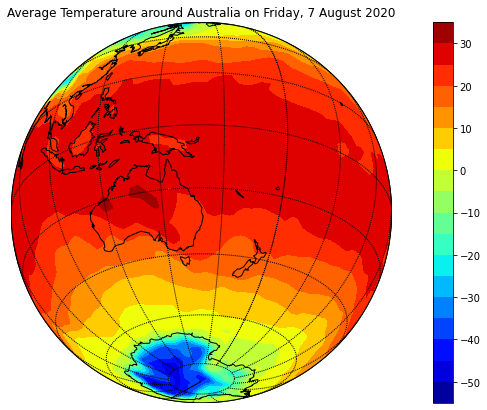

In [5]:
from    mpl_toolkits.basemap import Basemap

filename = 'air.sig995.2020.nc'
download_path = str(Path.home() / "Downloads")

url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/surface/' + filename

if not os.path.exists(download_path+ '\\' + filename):
    print("Downloading to the folder:", download_path)
    download_file  = wget.download(url, out=download_path)
    print("\nDownload complete")   

map = Basemap ( projection = 'ortho', lat_0=-27.4705, lon_0 = 153.0260,
                resolution = 'c')

dataset = netCDF4.Dataset(download_path+ '\\' + filename)

avg_air_temp = dataset.variables['air'] 
air_temp_c   = avg_air_temp[:] - 273.15

lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]

lon2, lat2 = np.meshgrid(lon, lat)
x, y = map (lon2, lat2)

fig = plt.figure (figsize = (15,7))

map.drawcoastlines()
map.drawparallels (np.arange(-80.0, 81.0, 20))
map.drawmeridians (np.arange(-180.0, 181.0, 20))
map.drawmapboundary (fill_color='white')
contour = map.contourf (x, y, air_temp_c[220, : , : ], 20, 
                        cmap = plt.cm.get_cmap ('jet'))
plt.title ('Average Temperature around Australia on Friday, 7 August 2020')
plt.colorbar()
plt.show()
dataset.close()